# Multiscale views of an Alfvenic slow solar wind: 3D velocity distribution functions observed by the Proton-Alpha Sensor of Solar Orbiter


In [1]:
import speasy as spz
import matplotlib
import matplotlib.pyplot as plt
import  speasy as spz
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#%matplotlib inline
#%config InlineBackend.figure_formats = ['svg']

Define the observation dates

In [2]:
start = "2020-07-14T10:00:00"
stop  = "2020-07-15T06:00:00"

## Magnetic field data
Magnetic field measurements are stored under the `amda/solo_b_rtn_hr` parameter. We save the `SpeasyVariable` object as `b_rtn_hr` for later use.

In [3]:
b_rtn_hr = spz.get_data("amda/solo_b_rtn_hr", start, stop)

We can easily check the data by using the `SpeasyVariable.plot` method (calls `pandas.DataFrame.plot`)

<AxesSubplot:ylabel='b_rtn nT'>

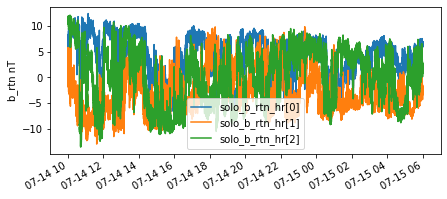

In [4]:
b_rtn_hr.plot(figsize=(7,3), ylabel="b_rtn "+b_rtn_hr.meta["PARAMETER_UNITS"])

Transform the variable to a `pandas.DataFrame` object using the `to_dataframe` method. `to_dataframe` accepts a `datetime_index` argument (default:`False`) indicating if time values should be converted to `datetime` objects.

Let's store the magnetic field in a dataframe called `b_rtn_df`.

In [5]:
b_rtn_df = b_rtn_hr.to_dataframe(datetime_index=True)
b_rtn_df.rename()
b_rtn_df.describe()

,solo_b_rtn_hr[0],solo_b_rtn_hr[1],solo_b_rtn_hr[2]
count,576009.000000,576009.000000,576009.00000
mean,4.436778,-3.022162,0.31365
std,3.676364,4.013111,5.41409
min,-7.779760,-12.940800,-13.52930
25%,1.998190,-5.914900,-4.33148
50%,4.978280,-3.851050,1.15283
75%,7.296500,-0.396841,4.84777
max,12.380900,9.837870,12.08040


The `meta` attribute contains some useful information, for example we can get the names of the components and units.

In [6]:
print(b_rtn_hr.meta["PARAMETER_COMPONENTS"])
print(b_rtn_hr.meta["PARAMETER_UNITS"])

br,bt,bn
nT


For convinenience we can rename the columns of the dataframe. The `PARAMETER_COMPONENTS` key is not present for scalar time-series, you can use `PARAMETER_NAME` or `PARAMETER_SHORT_NAME` instead.

In [64]:
def rename_columns(df, param):
    if not "PARAMETER_COMPONENTS" in param.meta:
        component_map = {df.columns[0]:param.meta["PARAMETER_SHORT_NAME"]}
    else:
        component_names = param.meta["PARAMETER_COMPONENTS"].split(",")
        component_map = {n1:n2 for n1,n2 in zip(df.columns, component_names)}
    df = df.rename(columns = component_map)
    return df

b_rtn_df = rename_columns(b_rtn_df, b_rtn_hr)
b_rtn_df.describe()

,br,bt,bn
count,576009.000000,576009.000000,576009.00000
mean,4.436778,-3.022162,0.31365
std,3.676364,4.013111,5.41409
min,-7.779760,-12.940800,-13.52930
25%,1.998190,-5.914900,-4.33148
50%,4.978280,-3.851050,1.15283
75%,7.296500,-0.396841,4.84777
max,12.380900,9.837870,12.08040


And make the figure a bit more pleasant.

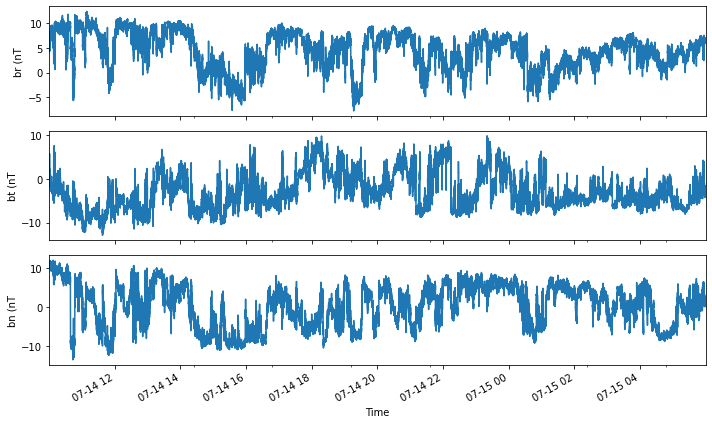

In [65]:
units = b_rtn_hr.meta["PARAMETER_UNITS"]
fig, ax = plt.subplots(3,1,figsize=(10,6), sharex=True)
for i,name in enumerate(b_rtn_df.columns):
    b_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{component_names[i]} ({units}")
plt.xlim([b_rtn_df.index[0],b_rtn_df.index[-1]])
ax[2].set_xlabel("Time")
plt.tight_layout()

## Velocity data

PAS proton velocity data is available on AMDA and it's identifier is `pas_momgr1_v_rtn`. We set the data aside under the `v_rtn` variable.

In [66]:
v_rtn = spz.get_data("amda/pas_momgr1_v_rtn", start, stop)

Create a dataframe object.

In [67]:
v_rtn_df = rename_columns(v_rtn.to_dataframe(datetime_index=True),
                          v_rtn)


v_rtn_df.describe()

,vr,vt,vn
count,27514.000000,27514.000000,27514.000000
mean,426.249599,-6.334826,0.317864
std,17.954961,15.367386,20.181820
min,384.967000,-59.670600,-43.584300
25%,412.822500,-16.342600,-16.186175
50%,424.106500,-3.483475,-2.348700
75%,438.325250,4.522003,16.442050
max,488.915000,29.120100,58.001800


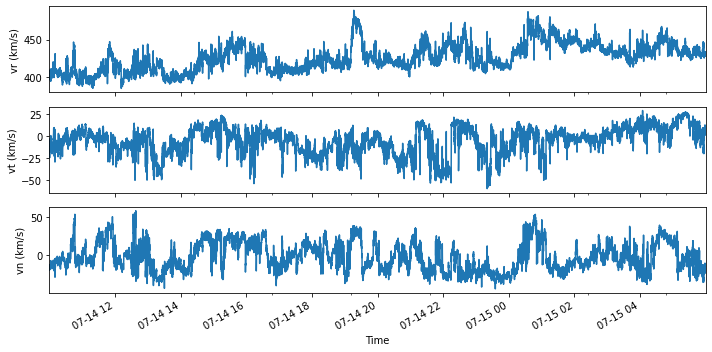

In [68]:
titles = v_rtn.meta["PARAMETER_COMPONENTS"].split(",")
units = v_rtn.meta["PARAMETER_UNITS"]
fig, ax = plt.subplots(3,1,figsize=(10,5), sharex=True)
for i,name in enumerate(v_rtn_df.columns):
    v_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{titles[i]} ({units})")
plt.xlim([v_rtn_df.index[0],v_rtn_df.index[-1]])
plt.xlabel("Time")
plt.tight_layout()

## Density

PAS proton density is identified `pas_momgr_n`.

In [70]:
sw_n = spz.get_data("amda/pas_momgr_n", start, stop)
sw_n_df = rename_columns(sw_n.to_dataframe(datetime_index=True),sw_n)
sw_n_df.describe()

,density
count,27514.000000
mean,16.025642
std,2.405489
min,5.053780
25%,14.319725
50%,15.890950
75%,17.525500
max,30.859600


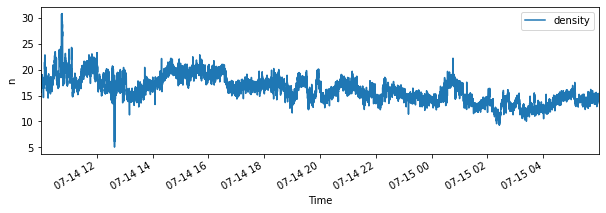

In [71]:
sw_n_df.plot(figsize=(10,3))
plt.xlim([sw_n_df.index[0], sw_n_df.index[-1]])
plt.ylabel("n")
plt.xlabel("Time")
plt.show()

## Proton flux temperature

Proton flux temperature is identified `pas_momgr_tav`.

In [72]:
tav = spz.get_data("amda/pas_momgr_tav", start, stop)
tav_df = rename_columns(tav.to_dataframe(datetime_index=True), tav)
tav_df.describe()

,t_av
count,27514.000000
mean,12.799194
std,2.060786
min,8.017990
25%,11.346600
50%,12.981350
75%,14.296200
max,52.293900


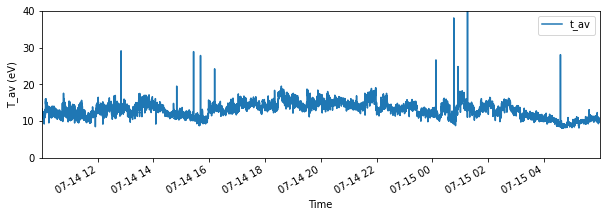

In [73]:
tav_df.plot(figsize=(10,3))
plt.xlabel("Time")
plt.ylabel("T_av (eV)")
plt.xlim([tav_df.index[0], tav_df.index[-1]])
plt.ylim([0,40])
plt.show()

## Proton energy

Proton energy is `pas_l2_omni`. We define a function `spectro_plot` for retrieving and plotting the energy data. `spectro_plot` requires three mandatory arguments : 
- `param_id` : the identifier of the parameter we want to download
- `start` : start time
- `stop` : stop time

In [15]:
def spectro_plot(param_id, start, stop, xlabel=None, ylabel=None, 
                 zlabel=None, yscale=None,
                 channels = None, ax=None, figsize=(10,2), 
                 vmin=None, vmax=None, lognorm=True, datefmt="%H:%M",
                 cmap=None):
    import matplotlib
    import matplotlib.colors as colors
    import matplotlib.ticker as mticker
    from datetime import datetime
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    # get the data
    param_data = spz.get_data(param_id, start, stop)
    [n,m] = param_data.data.shape
    X = param_data.data 
    
    # channels (constant channels case)
    if channels is None:
        y = np.arange(0,m,1)
    else:
        y = channels
    
    # grid
    x1, y1 = np.meshgrid(param_data.time,y, indexing="ij")
    
    # data bounds
    if vmin is None:
        vmin = np.nanmin(X)
    if vmax is None:
        vmax = np.nanmax(X)
    
    # colormap
    if not cmap:
        cmap = matplotlib.cm.rainbow.copy()
        cmap.set_bad('White',0.)
    
    # normalize colormapping
    if lognorm and vmin>0.:
        norm=colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm=None
    
    
    c = ax.pcolormesh(x1, y1, X, cmap=cmap, norm=norm, edgecolors="face")
    cbar = plt.colorbar(c,ax=ax, norm=norm)
    if zlabel:
        cbar.set_label(zlabel)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    x_ticks = ax.get_xticks()
    x_ticks = [datetime.utcfromtimestamp(xi) for xi in x_ticks]
    x_labels = [d.strftime(datefmt) for d in x_ticks]
    
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(x_labels)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    ax.set_ylim(y.min(), y.max())
    
    if yscale:
        ax.set_yscale(yscale)
    
    return ax, param_data
    

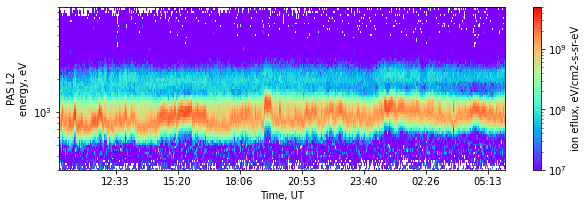

In [16]:
ybin_min = np.array([17916.95, 16895.68, 15932.63, 15024.47, 14168.07, 13360.49, 12598.94, 
    11880.81, 11203.6, 10565, 9962.79, 9394.91, 8859.4, 8354.42, 7878.21, 
    7429.16, 7005.69, 6606.37, 6229.81, 5874.71, 5539.85, 5224.08, 4926.31, 
    4645.51, 4380.71, 4131.01, 3895.55, 3673.5, 3464.11, 3266.66, 3080.46, 
    2904.87, 2739.29, 2583.15, 2435.91, 2297.07, 2166.13, 2042.66, 1926.23, 
    1816.44, 1712.9, 1615.26, 1523.19, 1436.37, 1354.5, 1277.29, 1204.49, 
    1135.83, 1071.09, 1010.04, 952.47, 898.17, 846.98, 798.7, 753.17, 710.24, 
    669.76, 631.58, 595.58, 561.64, 529.62, 499.43, 470.97, 444.12, 418.81, 
    394.93, 372.42, 351.19, 331.18, 312.3, 294.5, 277.71, 261.88, 246.96, 
    232.88, 219.6, 207.09, 195.28, 184.15, 173.66, 163.76, 154.42, 145.62, 
    137.32, 129.49, 122.11, 115.15, 108.59, 102.4, 96.56, 91.06, 85.87, 
    80.97, 76.36, 72.01, 67.9])
ybin_max = np.array([18999.94, 17916.95, 16895.68, 15932.63, 15024.47, 14168.07, 13360.49, 
    12598.95, 11880.81, 11203.6, 10565, 9962.79, 9394.91, 8859.4, 8354.42, 
    7878.21, 7429.16, 7005.7, 6606.37, 6229.81, 5874.71, 5539.85, 5224.08, 
    4926.31, 4645.51, 4380.71, 4131.01, 3895.55, 3673.5, 3464.11, 3266.66, 
    3080.46, 2904.87, 2739.29, 2583.15, 2435.91, 2297.07, 2166.13, 2042.66, 
    1926.23, 1816.44, 1712.9, 1615.26, 1523.19, 1436.37, 1354.5, 1277.29, 
    1204.49, 1135.83, 1071.09, 1010.04, 952.47, 898.17, 846.98, 798.7, 
    753.17, 710.24, 669.76, 631.58, 595.58, 561.64, 529.62, 499.43, 470.97, 
    444.12, 418.81, 394.93, 372.42, 351.19, 331.18, 312.3, 294.5, 277.71, 
    261.88, 246.96, 232.88, 219.6, 207.09, 195.28, 184.15, 173.66, 163.76, 
    154.42, 145.62, 137.32, 129.49, 122.11, 115.15, 108.59, 102.4, 96.56, 
    91.06, 85.87, 80.97, 76.36, 72.01])
ybins = np.vstack((ybin_min, ybin_max)).T
channels = np.mean(ybins, axis=1)

ax, pas_omni = spectro_plot("amda/pas_l2_omni", start, stop, 
                  channels=channels, 
                  xlabel="Time, UT",
                  ylabel="PAS L2\nenergy, eV", 
                  zlabel="ion eflux, eV/cm2-s-sr-eV",
                  yscale="log",
                  figsize=(10,3),
                  vmin=1e7, vmax=5e9,
                  lognorm=True,
                 )
plt.ylim([3e2,9e3])
plt.show()

## Correlation

Study of the correlation between `v_rtn` and `b_rtn`. 

We will need to perform operations on data that is not regularly sampled as represented on the figure below.

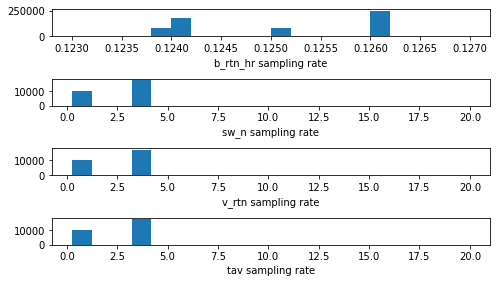

In [29]:
fig, ax = plt.subplots(4,1,figsize=(7,4))
ax[0].hist(np.diff(b_rtn_hr.time), bins=20)
ax[0].set_xlabel("b_rtn_hr sampling rate")
ax[1].hist(np.diff(sw_n.time), bins=20)
ax[1].set_xlabel("sw_n sampling rate")
ax[2].hist(np.diff(v_rtn.time), bins=20)
ax[2].set_xlabel("v_rtn sampling rate")
ax[3].hist(np.diff(tav.time), bins=20)
ax[3].set_xlabel("tav sampling rate")
plt.tight_layout()

Resample the data every second. Create a new dataframe object `df_1s` which will contain all the data.

In [135]:
b_rtn_1s = b_rtn_df.resample("1S").fillna("pad")
sw_n_1s = sw_n_df.resample("1S").fillna("pad")
v_rtn_1s = v_rtn_df.resample("1S").fillna("pad")

df_1s = b_rtn_1s.merge(sw_n_1s, left_index=True, right_index=True)
df_1s = df_1s.merge(v_rtn_1s, left_index=True, right_index=True)

df_1s.describe()

,br,bt,bn,density,vr,vt,vn
count,71997.000000,71997.000000,71997.000000,71996.000000,71996.000000,71996.000000,71996.000000
mean,4.436479,-3.022303,0.313607,16.235723,425.954116,-5.499633,-1.954408
std,3.675999,4.012931,5.414105,2.426260,17.762155,14.873811,18.220245
min,-7.641880,-12.710700,-13.472400,5.478010,384.967000,-59.670600,-43.282000
25%,2.005510,-5.914880,-4.322610,14.484825,412.498750,-14.778000,-16.209500
50%,4.976540,-3.851930,1.155090,16.096900,424.748000,-3.206085,-4.703670
75%,7.297520,-0.395311,4.848410,17.809400,437.517000,4.816280,12.270900
max,12.322200,9.772240,11.992300,30.859600,488.915000,29.120100,56.761200


Compute $$b = \frac{ B_{\mbox{rtn}} } { \left( m_p \mu_0 n \right)^{1/2} }$$

The column names `br,bt,bn` are already taken, we will use `b_r,b_t,b_n`.

In [136]:
m_p = 1.67e-27 
mu_0 = 1.25664e-6

N = df_1s.shape[0]

b = (df_1s[["br","bt","bn"]].values / 
             (np.sqrt(mu_0*m_p*1e6*df_1s["density"].values.reshape(N,1)))*1e-12)
colnames = ["b_r","b_t","b_n"]

## In case the correction is wrong this worked
#b = (b_rtn_1s[sw_n_1s.index[0]:].values / \
#          (np.sqrt(mu_0 * sw_n_1s.values * 1e6 * m_p) ) *1e-12)

b = pd.DataFrame(data=b, index=df_1s.index, columns=colnames)
df_1s = df_1s.merge(b, right_index=True, left_index=True)

df_1s[["b_r","b_t","b_n"]].describe()

,b_r,b_t,b_n
count,71996.000000,71996.000000,71996.000000
mean,24.435180,-16.308684,2.815562
std,19.742385,21.555876,28.862056
min,-39.813502,-64.716322,-68.406321
25%,10.977408,-32.669725,-22.717005
50%,27.979323,-21.045645,6.404941
75%,40.156336,-2.147645,27.531268
max,69.329620,53.754861,81.635791


Compute : $$\hat{v} = v - \langle v \rangle_{\mbox{1h}}$$
and $$\hat{b} = b - \langle b \rangle_{\mbox{1h}}$$

<AxesSubplot:>

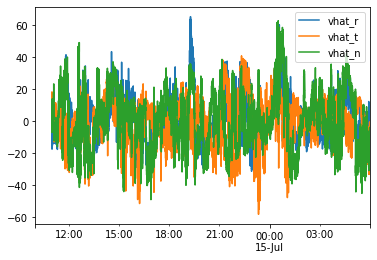

In [137]:
vhat = df_1s[["vr","vt","vn"]] - df_1s[["vr","vt","vn"]].rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(vhat.columns, 
                                 ["vhat_r","vhat_t","vhat_n"])}
vhat = vhat.rename(columns=colmap)
df_1s = df_1s.merge(vhat, right_index=True, left_index=True)

df_1s[["vhat_r","vhat_t","vhat_n"]].plot()

<AxesSubplot:>

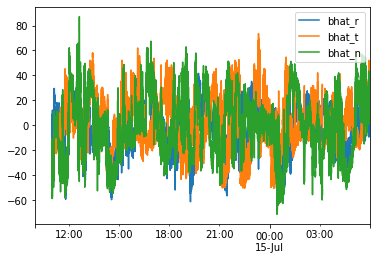

In [138]:
bhat = b - b.rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(bhat.columns, 
                                 ["bhat_r","bhat_t","bhat_n"])}
bhat = bhat.rename(columns=colmap)
df_1s = df_1s.merge(bhat, right_index=True, left_index=True)

df_1s[["bhat_r","bhat_t","bhat_n"]].plot()

(1594756800.0, 1594792800.0)

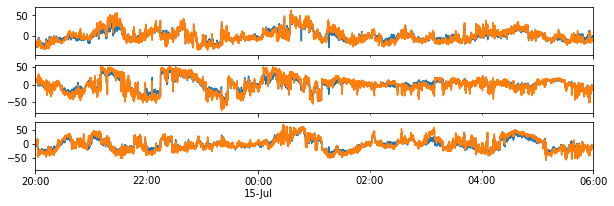

In [142]:
fig, ax = plt.subplots(3,1,sharex=True, figsize=(10,3))
for i in range(3):
    vhat.iloc[:,i].plot(ax=ax[i], label="v")
    (-bhat).iloc[:,i].plot(ax=ax[i], label="b")
t0 = datetime(2020,7,14,20)
plt.xlim([t0, t0+timedelta(hours=10)])

(1594756800.0, 1594792800.0)

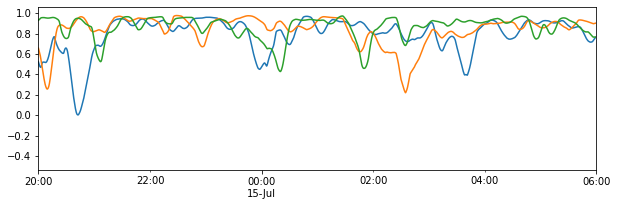

In [160]:
fig, ax = plt.subplots(1,1,figsize=(10,3),sharex=True)
for i in range(3):
    (-bhat).iloc[:,i].rolling(1200).corr(v_rtn_1s.iloc[:,i]).rolling(600).mean().plot(ax=ax)
plt.xlim([t0, t0+timedelta(hours=10)])

## Spectra



In [161]:
import multiprocessing

import numpy as np

def unpacking_apply_along_axis(all_args):
    """
    Like numpy.apply_along_axis(), but with arguments in a tuple
    instead.

    This function is useful with multiprocessing.Pool().map(): (1)
    map() only handles functions that take a single argument, and (2)
    this function can generally be imported from a module, as required
    by map().
    """
    func1d, axis, arr, args, kwargs = all_args
    return np.apply_along_axis(func1d, axis, arr, *args, **kwargs)

def parallel_apply_along_axis(func1d, axis, arr, *args, **kwargs):
    """
    Like numpy.apply_along_axis(), but takes advantage of multiple
    cores.
    """        
    # Effective axis where apply_along_axis() will be applied by each
    # worker (any non-zero axis number would work, so as to allow the use
    # of `np.array_split()`, which is only done on axis 0):
    effective_axis = 1 if axis == 0 else axis
    if effective_axis != axis:
        arr = arr.swapaxes(axis, effective_axis)

    # Chunks for the mapping (only a few chunks):
    chunks = [(func1d, effective_axis, sub_arr, args, kwargs)
              for sub_arr in np.array_split(arr, multiprocessing.cpu_count())]

    pool = multiprocessing.Pool()
    individual_results = pool.map(unpacking_apply_along_axis, chunks)
    # Freeing the workers:
    pool.close()
    pool.join()

    return np.concatenate(individual_results)


In [ ]:
#from scipy.fft import fft, fftfreq, rfft, rfftfreq
from numpy.fft import fft, fftfreq, rfft, rfftfreq

window_length = 7200*2

A = v_rtn_df - v_rtn_df.rolling(1200).mean()
A = A.dropna()

v_sp = rfft(A.values, axis=0)
v_sp = np.sum(v_sp, axis=1)

v_freq = rfftfreq(A.shape[0], 1.)


sp_v = pd.DataFrame(index=np.abs(v_freq), data=np.absolute(v_sp))
sp_v = sp_v.dropna()
sp_v = sp_v[~sp_v.index.duplicated(keep="first")]


# mag
b_resampled = b_rtn_df.resample(".25S").fillna("pad")
n_resampled = sw_n_df.resample(".25S").fillna("pad")

v_temp = (b_resampled.values[14:] / \
          np.sqrt(mu_0 * n_resampled.values * 1e6 * m_p) ) *1e-12
v_temp = pd.DataFrame(data=v_temp, index=n_resampled.index)

v_temp = v_temp - v_temp.rolling(3600*4).mean()
v_temp = v_temp.dropna()

b_sp = rfft(v_temp.values, axis=0)
b_sp = np.sum(b_sp, axis=1)


b_freq = rfftfreq(v_temp.shape[0], d=.25)
sp_b = pd.DataFrame(data=np.absolute(b_sp), index=np.abs(b_freq))
sp_b = sp_b.dropna()
sp_b = sp_b[~sp_b.index.duplicated(keep="first")]

import time
def time_func(func, args=(), kwargs={}):
    t0 = time.time()
    r = func(*args, **kwargs)
    return time.time()-t0, r

def f(r, x, alpha=.04):
    fmin,fmax = (1.-alpha)*r[0].item(), (1.+alpha)*r[0].item()
    return np.mean(x[fmin:fmax])
def f2(r, x, alpha=.04):
    fmin,fmax = (1.-alpha)*r[0], (1.+alpha)*r[0]
    indx = (x[:,0]>=fmin) & (x[:,0]<fmax)
    if np.sum(indx)==0:
        return np.nan
    return np.mean(x[indx,1])

def proportional_rolling_mean(x, alpha=.04):
    
    X = np.hstack((x.index.values.reshape(x.index.shape[0],1), x.values))
    Y = parallel_apply_along_axis(f2, 1, X, X)
    #Y = np.apply_along_axis(f2, 1, X, X)
    return pd.DataFrame(index=X[:,0], data=Y)
    return x.apply(f, axis=1, args=(x,))
print("Computing F_v_rtn proportional mean")
t1,sp_v=time_func(proportional_rolling_mean, args=(sp_v,))
print(f"\t{t1} seconds")
print("Computing F_b_rtn proportional mean")
t2,sp_b = time_func(proportional_rolling_mean, args=(sp_b,))
print(f"\t{t2} seconds")
print("done")

#sp_bb = pd.DataFrame(data=new_b, index=sp_b.index)


fig, ax = plt.subplots(1,1)
sp_v.plot(ax=ax, label="v")
sp_b.plot(ax=ax, label="b")

#plt.plot(sp_v.index, sp_v.rolling(10).mean(), label="v_rtn")
#plt.plot(np.abs(b_freq), np.absolute(b_sp).rolling(10).mean(), label="b_rtn")

plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-4, 1e1])
plt.xlim([1e-4, 1e8])
plt.legend()


In [ ]:
# Scatter
def interp(df, new_index):
    """Return a new DataFrame with all columns values interpolated
    to the new_index values."""
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col)

    return df_out


bb = v_temp.resample("4S").fillna("pad")
vv = interp(v_rtn_df - v_rtn_df.rolling(3600).mean(), bb.index)


fig, ax = plt.subplots(3,1, figsize=(7,15))
coord = "rtn"
for i in range(3):
    xx = -bb.values[:,i]
    yy = vv.values[:,i]
    cs=ax[i].scatter(xx, yy, c=bb.index, cmap=cmap, marker=".", alpha=.3)
    ax[i].set_xlabel(f"b_{coord[i]}")
    ax[i].set_ylabel(f"v_{coord[i]}")
    plt.colorbar(cs,ax=ax[i])
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.colors as colors
import matplotlib as mpl
cmap = matplotlib.cm.rainbow.copy()
cmap.set_bad('White',0.)
fig,ax = plt.subplots(3,1,sharex=True, figsize=(10,5))
for i in range(3):
    vmin,vmax = np.nanmin(v_temp.values[:,i]),np.nanmax(v_temp.values[:,i])
    #norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    pxx,freq,t,cax=ax[i].specgram(v_temp.values[:,i], NFFT=300*4,Fs=4,cmap=cmap,norm=None)
    plt.colorbar(cax, ax=ax[i])
plt.show()

In [ ]:
fig,ax = plt.subplots(3,1,sharex=True, figsize=(10,5))
for i in range(3):
    vmin,vmax = np.nanmin(A.values[:,i]),np.nanmax(A.values[:,i])
    #norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    pxx,freq,t,cax=ax[i].specgram(A.values[:,i], NFFT=300,Fs=1.,cmap=cmap,norm=None)
    plt.colorbar(cax, ax=ax[i])
plt.show()

In [ ]:
from scipy import signal

t = v_rtn.time

widths = np.arange(60, 600, 10)

fig, ax = plt.subplots(3,1,sharex=True,figsize=(10,5))
for i in range(3):
    cwtmatr = signal.cwt(v_rtn.values[:,i], signal.ricker, widths)
    cs=ax[i].imshow(cwtmatr, extent=[-60, 60, 600, 60], cmap=cmap, 
               aspect='auto',
           vmax=abs(cwtmatr).max(), 
               vmin=-abs(cwtmatr).max())
    plt.colorbar(cs, ax=ax[i])

plt.show()


In [ ]:
t = v_temp.index.to_numpy()

widths = np.arange(60*4, 600*4, 10*4)

fig, ax = plt.subplots(3,1,sharex=True,figsize=(10,5))
for i in range(3):
    cwtmatr = signal.cwt(v_temp.values[:,i], signal.ricker, widths)
    cs=ax[i].imshow(cwtmatr, extent=[-60*4, 60*4,600*4, 60*4], cmap=cmap, 
               aspect='auto',
           vmax=abs(cwtmatr).max(), 
               vmin=-abs(cwtmatr).max())
    plt.colorbar(cs, ax=ax[i])

plt.show()